<a href="https://colab.research.google.com/github/senapathi402-star/data_cleaning_titanic/blob/main/Titanic_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic_data_cleaning**

## **Titanic**

The RMS Titanic was a massive, luxurious British ocean liner. Built by Harland and Wolff, it was considered "practically unsinkable" due to advanced features like watertight compartments.

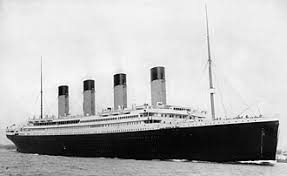

In [1]:
import seaborn as sn
import numpy as np
import pandas as pd
df = sn.load_dataset('titanic')

In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.shape

(891, 15)

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [44]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [7]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace = True)

/tmp/ipython-input-1928778842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace = True)


In [8]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [9]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [10]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace = True)

/tmp/ipython-input-1905131457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0],inplace = True)


In [11]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [47]:
df.groupby('sex')['age'].mean().round(0)

,age
sex,
female,28.0
male,30.0


In [46]:
df['age'].fillna(df.groupby('sex')['age'].mean()[0].round(0),inplace = True)

/tmp/ipython-input-1635385471.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['age'].fillna(df.groupby('sex')['age'].mean()[0].round(0),inplace = True)
/tmp/ipython-input-1635385471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df.groupby('sex')['age'].mean()[0].round(0),inplace = True)


In [14]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [15]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [31]:
df['deck'] = df['deck'].fillna(df.groupby('pclass')['deck'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [52]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,F,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,F,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,F,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,27,1,2,23.4500,S,Third,woman,False,F,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [30]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:
df['age'] = df['age'].astype(int)

In [37]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,F,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,F,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,F,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,27,1,2,23.4500,S,Third,woman,False,F,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
df.duplicated().sum()

np.int64(113)

**Insights**
- In this data set total of 891 Rows and 15 columns present.
- total 4 columns contains Null values which were ['age','embarked','embarked_town','deck'].
- S is the most people who boarded in this ship.
- S means 'Southampton' which was the town name.
- Female average age was 28 years total boarded.
- male average age was 30 years total boarded.
- deck F is the most people resided in this ship.
- total of 113 duplicates were found in this dataset.

**Conclusion**
- While cleaning this dataset found the duplicates but which were unable to drop those rows because there may be multiple people whith same age, gender,class, deck, and boarded town without the thoe person name it was an incomplete data so considering this no duplicates were deleted.